# Employee Attrition Analysis
The IBM HR Analytics dataset was obtained from [here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) and contains fictional data.

## Overview

Workplace attrition is when an employee leaves the company. There can be several reasons for this, and not all of them are things the company has control over. But when an employee leaves, this costs companies a great deal as they have to go through the process of recruiting, interviewing, hiring, and training new employees. By better understanding why people leave, the company can help address problems in the workplace, keep their employees happy and working for them, and save money in the process.   
  
Through exploratory data analysis, I was able to identify some key trends with regards to attrition rates and determine a few items that the company has direct control over that could help reduce the number employees leaving:
- The attrition rate for employees who receive no training is about 30%. Increasing training throughout the company can help reduce workplace attrition and lead to a more productive workforce.
- Employees that work overtime leave the company 30% of the time, while those that don't only leave 10% of the time. Hiring an additional employee in overworked departments can potentially reduce attrition.
- Sales Representatives have the highest attrition rate by far (~40%). It is worth looking into why that is and what the company can do to about it.
- The attrition rate is noticeably higher for entry level positions (>25%). It might be worth researching how to make entry level employees feel it is worth staying with the company, such as increased training and promotion opportunities.
  
Using machine learning, I was able to correctly predict whether an employee would leave with about 87% accuracy. This model can help the fictional company in this case study identify and work with at risk employees to try and keep them before they leave.

### Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Reading in the Dataset

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
print("Dataset contains {:,d} rows and {} columns.".format(*df.shape))
df.head()

Dataset contains 1,470 rows and 35 columns.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#converting Attrition to a binary variable
df.Attrition = df.Attrition.apply(lambda x: 1 if x=="Yes" else 0)

In [4]:
#calculating the attrition rate of all the employees
print("Overall Attrition Rate: {:.2f}%".format(100*df.Attrition.mean()))
print("Number of Employees that Left the Company: {:,d}".format(df.Attrition.sum()))

Overall Attrition Rate: 16.12%
Number of Employees that Left the Company: 237


In [5]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Creating an Exploratory Data Analysis Report with Pandas Profiling

To avoid making this notebook unnecessarily long, I did not show the results of the pandas_profiling report here. You can view the results in the Attrition_EDA.html file.

In [6]:
#creating report
profile = ProfileReport(df)

#saving report to file
profile.to_file(output_file="Attrition_EDA.html")

## Dropping Variables based on Report

In [7]:
drop_cols = ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours']
df.drop(labels=drop_cols, axis=1, inplace=True)

print("Dataset contains {:,d} rows and {} columns.".format(*df.shape))

Dataset contains 1,470 rows and 31 columns.


## Visualizing Relationships between Attrition and Different Features

A couple differences that stood out between the employees that stayed vs the ones that left:  
- The average age is greater for employees that stayed (37.56) compared to those that left (33.61).  
- The Daily Rate of the people that stayed is about $62 higher.  
- Employees that stayed live closer to the office on average.  
  
There were also a couple similarities between the two groups that surprised me:
- While job satisfaction and involvement are slightly higher on average for the employees that stayed, the difference isn't as large as I was expecting.
- The average performance ratings for employees that stayed and left are almost identical.

In [8]:
#looking at column statistics for those that stayed
df[df.Attrition == 0].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [9]:
#looking at column statistics for those that stayed
df[df.Attrition == 1].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


Looking through the visualizations below, here are some interesting trends I noticed:
- The attrition rate is higher for employees who receive less training. This is something the company can directly control, and can help reduce attrition rate.
- Employees that work overtime leave the company 30% of the time, while those that don't only leave 10% of the time. Perhaps hiring an additional employee in overworked departments can reduce attrition.
- Sales Representatives have the highest attrition rate by far (about 40%). It is worth looking into why that is and what the company can do to about it.
- The attrition rate is noticeably higher for entry level positions (>25%). It might be worth researching how to make entry level employees feel it is worth staying with the company, such as increased training and promotion opportunities.
- Employees with low work-life balance leave the company more often on average. The company can reduce the amount of overtime and promote general health and wealthness plans to help employees improve their work-life balance, and in doing so, hopefully reduce their attrition rates.
- The attrition rate is higher for lower values of JobSatisfaction, JobInvolvement, EnvironmentSatisfaction, and RelationshipSatisfaction (I'm assuming with manager), which was expected.
- I'm surprised that there wasn't a clear trend between DistanceFromHome and attrition rate. I believe this dataset only contains data from one company, so this isn't representative of the entire working population, but I thought this would be more significant.

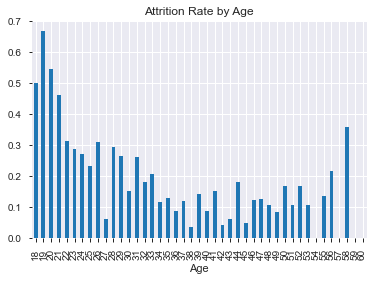

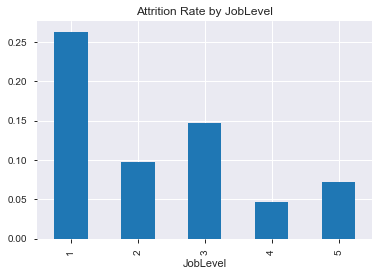

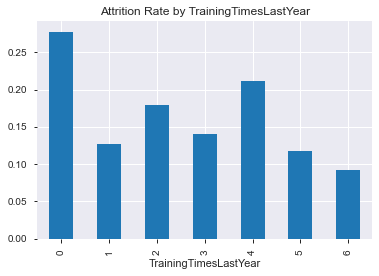

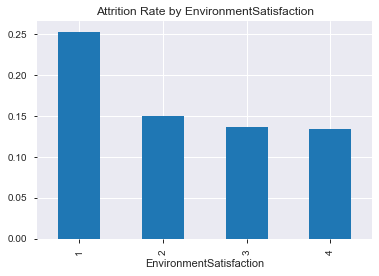

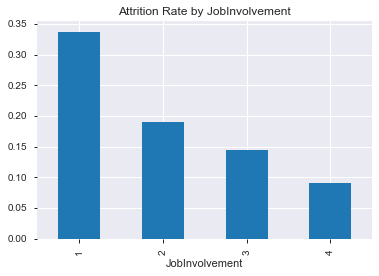

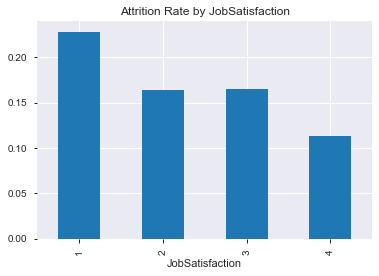

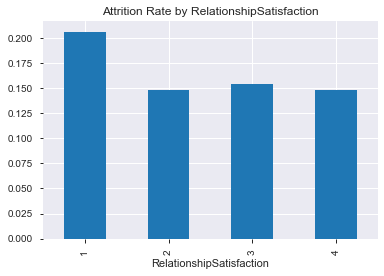

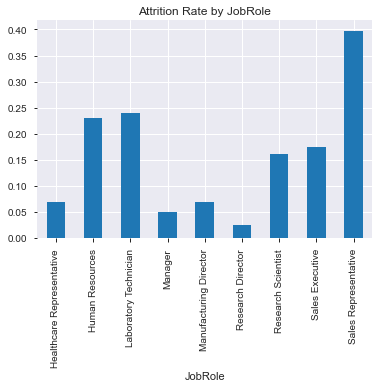

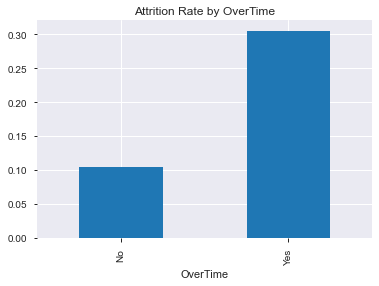

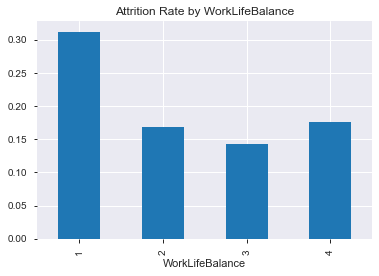

In [10]:
#storing the feature names to visualize
feature_names = [i for i in df.columns if i != 'Attrition']
interesting_features = ['Age', 'JobLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 
                        'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 
                        'JobRole', 'OverTime', 'WorkLifeBalance']
#aggregating and visualizing the features against attrition rate
for feature in interesting_features:
    grouped_df = df.groupby([feature])['Attrition'].mean()
    grouped_df.plot.bar()
    plt.title("Attrition Rate by {}".format(feature))
    plt.show()

## Performing Data Cleaning

In [11]:
#replacing Gender and Overtime strings with binary variable
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == "Female" else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == "Yes" else 0)

In [12]:
df_categorical = df[['Department', 'EducationField',
                     'JobRole', 'MaritalStatus']]

In [13]:
oh = OneHotEncoder()
X_cat = pd.DataFrame(oh.fit_transform(df_categorical).toarray())
print("Number of Encoded Categorical Columns: {}".format(X_cat.shape[1]))

Number of Encoded Categorical Columns: 21


In [14]:
X_num = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
            'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
            'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
            'PerformanceRating', 'RelationshipSatisfaction', 
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
            'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
            'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [15]:
X = pd.concat([X_cat, X_num], axis=1).values
y = df['Attrition'].values
print("Number of Combined Columns: {}".format(X.shape[1]))

Number of Combined Columns: 45


In [16]:
#splitting the dataset into training and testing sets
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

In [17]:
#normalizing the features
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)

In [18]:
#performing over-sampling to balance out the classes
sm = SMOTE(sampling_strategy=0.6, random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train)

In [19]:
print("Attrition Rate of the Original Dataset: {:.2f}%".format(100*y.mean()))
print("Attrition Rate of the Dataset after Over-Sampling: {:.2f}%".format(100*y_train_smote.mean()))

Attrition Rate of the Original Dataset: 16.12%
Attrition Rate of the Dataset after Over-Sampling: 37.47%


## Training a Random Forest Classifier to Predict Attrition

In [20]:
parameter_grid = {'n_estimators': [200, 300, 400],
                  'max_depth' : [100, 150, 200]}

gs = GridSearchCV(RandomForestClassifier(), 
                  param_grid=parameter_grid, 
                  scoring='roc_auc', 
                  cv=5)
gs.fit(X_train_smote, y_train_smote)

print("Best Parameters: \n", gs.best_params_)
print("Best Cross-Validated Training AUC Score: {:.4f}".format(gs.best_score_))

Best Parameters: 
 {'max_depth': 150, 'n_estimators': 400}
Best Cross-Validated Training AUC Score: 0.9761


In [21]:
y_pred = gs.best_estimator_.predict(X_test_norm)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       344
           1       0.29      0.71      0.41        24

    accuracy                           0.87       368
   macro avg       0.64      0.79      0.67       368
weighted avg       0.93      0.87      0.89       368



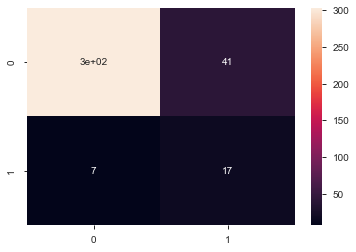

In [22]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
plt.show()